In [1]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud #--> en çok kullanılan kelimeler resmi oluşturacak şekilde yerleştirilip yazılması

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("spam.csv", encoding='latin-1') #ingilizcede olmayan karakter olduğu için latin-1 

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True) #inplace = true tekrar eşitlemesini istediğimiz için 

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.columns=["Class","Text"] #kolonların ismini değiştiridik

In [10]:
df["Label"]=df["Class"].map({"ham":0,"spam":1})

In [11]:
df.head()

,Class,Text,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


<AxesSubplot: xlabel='Class', ylabel='count'>

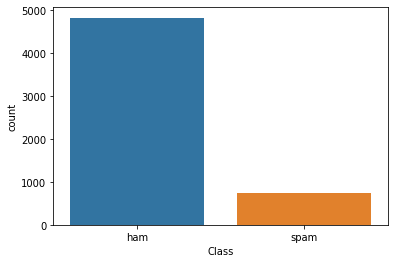

In [12]:
sns.countplot(x=df["Class"])

In [13]:
df['Text']=df['Text'].str.lower().replace('[^\w\s]','').replace('\d+','').replace('\n',' ').replace('\r',' ')

In [66]:
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np

In [80]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("alice_mask.png"))
    wc=WordCloud(background_color=bgcolor, stopwords=STOPWORDS, mask=mask) #gereksiz kelimleri çıkardık anahtar kelimeler kaldı.
    wc.generate(' '.join(data)) #datanın tüm satırlarını boşlukla birleştiriyor.
    plt.imshow(wc)
    plt.axis("off") # x,y koordinatını göstermemiş oluyoruz.

In [81]:
ham=df[df["Class"]=="ham"]['Text']

In [82]:
ham

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
6       even my brother is not like to speak with me. ...
                              ...                        
5565                                         huh y lei...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: Text, Length: 4825, dtype: object

In [83]:
spam=df[df["Class"]=="spam"]['Text']

In [84]:
spam

2       free entry in 2 a wkly comp to win fa cup fina...
5       freemsg hey there darling it's been 3 week's n...
8       winner!! as a valued network customer you have...
9       had your mobile 11 months or more? u r entitle...
11      six chances to win cash! from 100 to 20,000 po...
                              ...                        
5537    want explicit sex in 30 secs? ring 02073162414...
5540    asked 3mobile if 0870 chatlines inclu in free ...
5547    had your contract mobile 11 mnths? latest moto...
5566    reminder from o2: to get 2.50 pounds free call...
5567    this is the 2nd time we have tried 2 contact u...
Name: Text, Length: 747, dtype: object

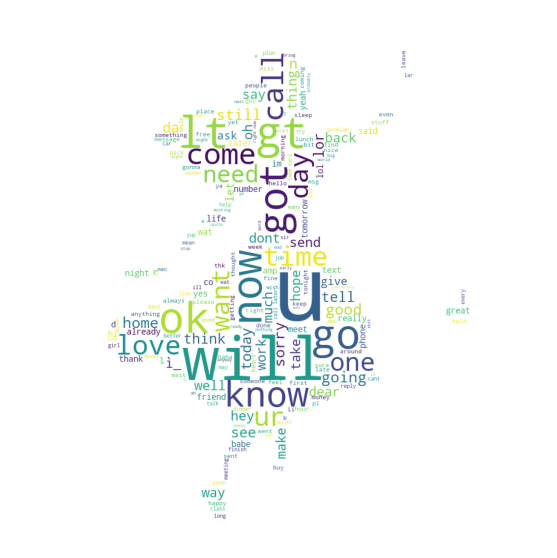

In [85]:
wc(ham,'white')

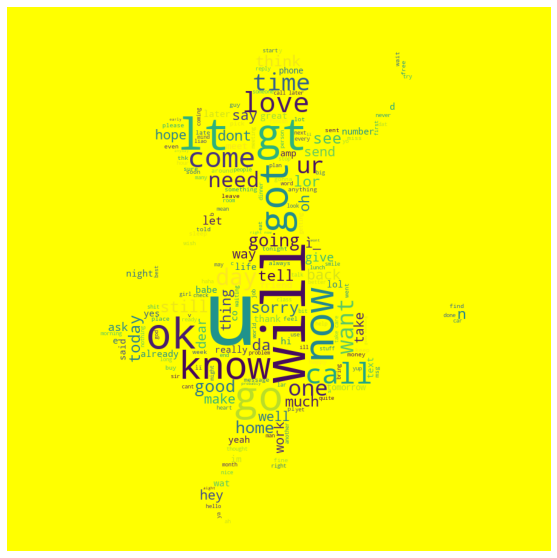

In [88]:
wc(ham,'yellow')

In [44]:
x=df["Text"]
y=df["Label"]

In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [46]:
vect=CountVectorizer(stop_words="english")

In [48]:
x=vect.fit_transform(x)

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.15)

In [59]:
mb=MultinomialNB()

In [60]:
tahmin=mb.fit(x_train,y_train).predict(x_test)

In [61]:
accuracy_score(tahmin,y_test)

0.9772727272727273

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
d=DecisionTreeClassifier()

In [64]:
tahmin2=d.fit(x_train,y_train).predict(x_test)

In [65]:
accuracy_score(tahmin2,y_test)

0.9700956937799043